In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas

from google.colab import drive

In [2]:
drive.mount('/content/drive')
filename ='drive/MyDrive/nyit/globalsuiciderates.csv'

df = pd.read_csv(filename)

Mounted at /content/drive


In [3]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [35]:
df.rename(columns={"suicides/100k pop":"suicides_100kpop","HDI for year":"HDI_for_year",
                  " gdp_for_year ($) ":"gdp_for_year","gdp_per_capita ($)":"gdp_per_capita"}, inplace=True)
print(df.columns)
df.head(5)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides_100kpop', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')


,country,year,sex,age,suicides_no,population,suicides_100kpop,country-year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides_100kpop    27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI_for_year        8364 non-null   float64
 9   gdp_for_year        27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [13]:
df.describe()

,year,suicides_no,population,suicides_100kpop,HDI_for_year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [14]:
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides_100kpop          0
country-year              0
HDI_for_year          19456
gdp_for_year              0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [15]:
df["generation"].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [16]:
df["age"].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [17]:
df["country"].nunique()

101

In [18]:
df.drop('HDI_for_year', axis= 1, inplace = True)

In [20]:
df = df.drop_duplicates(keep='first')

<ipython-input-44-4d3be37c8ef9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, fmt='.2f', square=True)


<Axes: >

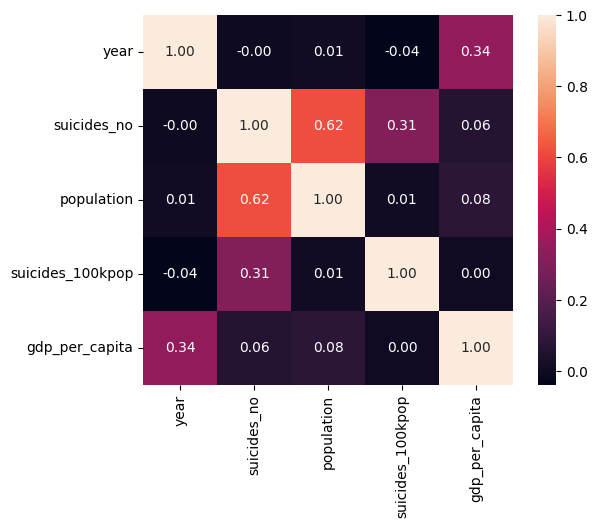

In [44]:
sns.heatmap(df.corr(),annot=True, fmt='.2f', square=True)

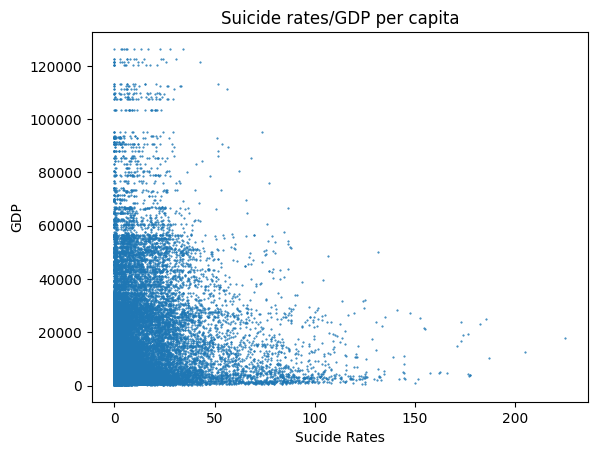

In [65]:
plt.plot('suicides_100kpop','gdp_per_capita',data=df,marker='o',linestyle='',markersize=0.50)
plt.xlabel('Sucide Rates')
plt.ylabel('GDP')
plt.title('Suicide rates/GDP per capita')
plt.show()

#Low GDP per capita affects suicides rates greatly

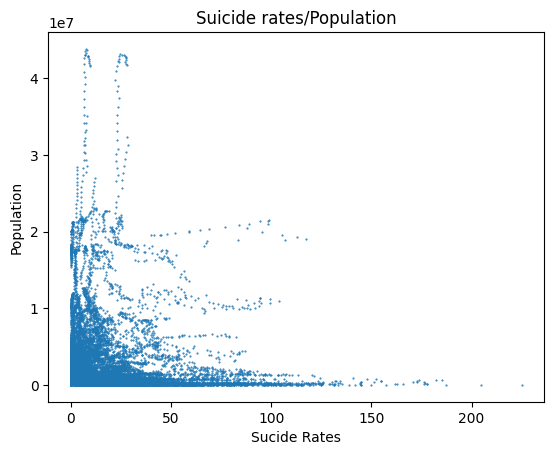

In [69]:
plt.plot('suicides_100kpop','population',data=df,marker='o',linestyle='',markersize=0.50)
plt.xlabel('Sucide Rates')
plt.ylabel('Population')
plt.title('Suicide rates/Population')
plt.show()

<Axes: xlabel='sex', ylabel='suicides_100kpop'>

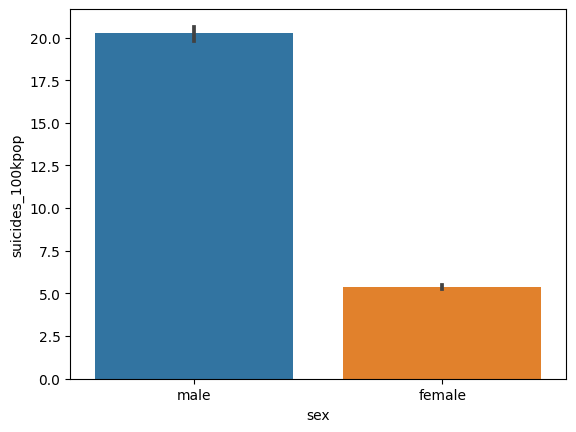

In [70]:
sns.barplot(x=df.sex,y=df.suicides_100kpop)
#Males commit suicide more than females

<Axes: xlabel='age', ylabel='suicides_100kpop'>

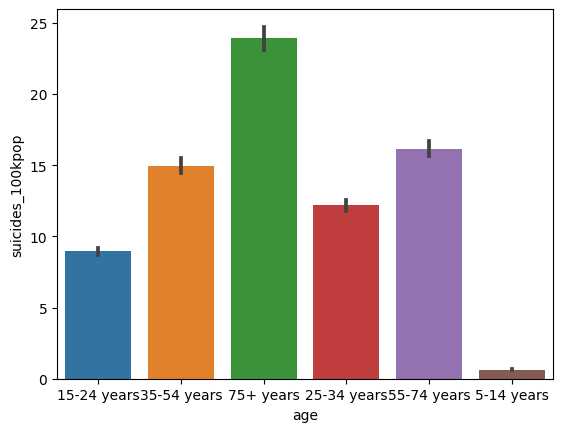

In [71]:
sns.barplot(x=df.age,y=df.suicides_100kpop)
#Older generation had most suicide numbers

<Axes: xlabel='generation', ylabel='suicides_100kpop'>

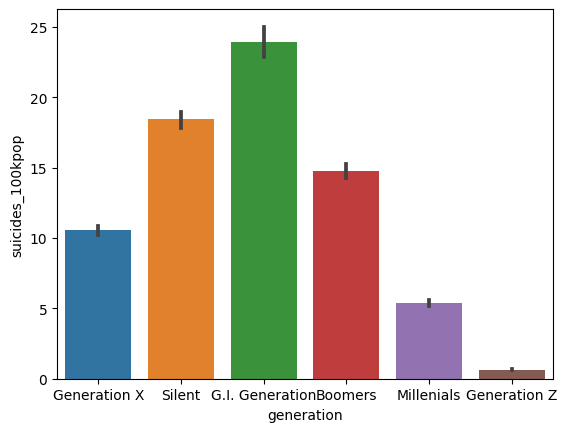

In [72]:
sns.barplot(x=df.generation,y=df.suicides_100kpop)
#G.I. Generations are more likely to commit suicide

In [56]:
pip install plotly_express

In [58]:
import plotly_express as px
world_choropelth_animated = px.choropleth(df.sort_values(by='year'),
    locations ="country",
    locationmode = 'country names',
    color ="suicides_100kpop",
    hover_name ="country",
    color_continuous_scale = 'PuBu',
    color_continuous_midpoint = 13,
    scope ="world",
    animation_frame ="year")
world_choropelth_animated.show()

#Looks like developed countries have higher suicide rates